In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset (update path if needed)
df = pd.read_csv("/content/drive/MyDrive/train.csv")

print("Initial Shape:", df.shape)
print(df.info())

Initial Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Check missing values
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())


Missing Values Before Cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())   # Replace Age with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Replace Embarked with mode
df = df.drop(columns=['Cabin'])  # Drop Cabin due to high missing rate

print("\nMissing Values After Cleaning:\n", df.isnull().sum())



Missing Values After Cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-1963105686.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette="Set2")


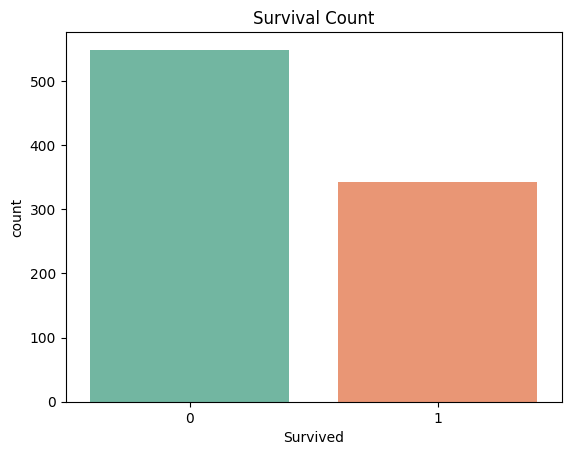

In [7]:
# ----------------- EDA Visualizations -----------------

# Survival Count
sns.countplot(x='Survived', data=df, palette="Set2")
plt.title("Survival Count")
plt.show()

/tmp/ipython-input-3736648298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette="muted")


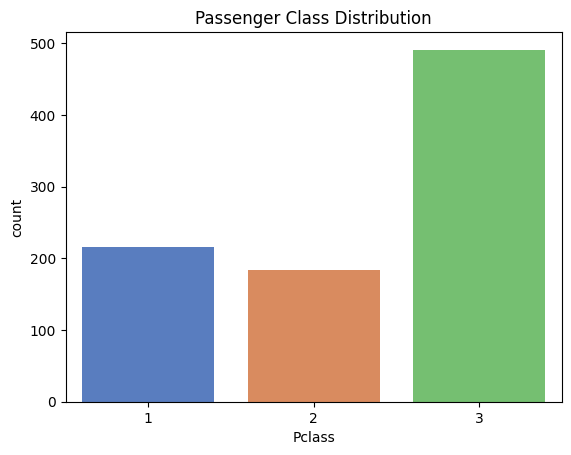

In [8]:
# Passenger Class Distribution
sns.countplot(x='Pclass', data=df, palette="muted")
plt.title("Passenger Class Distribution")
plt.show()

/tmp/ipython-input-2064537239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette="coolwarm")


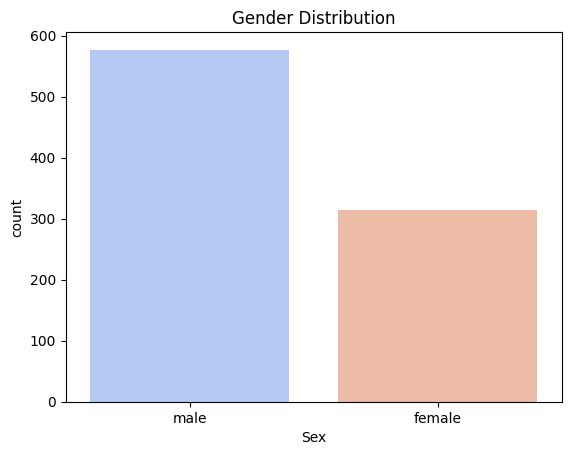

In [9]:
# Gender Distribution
sns.countplot(x='Sex', data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()

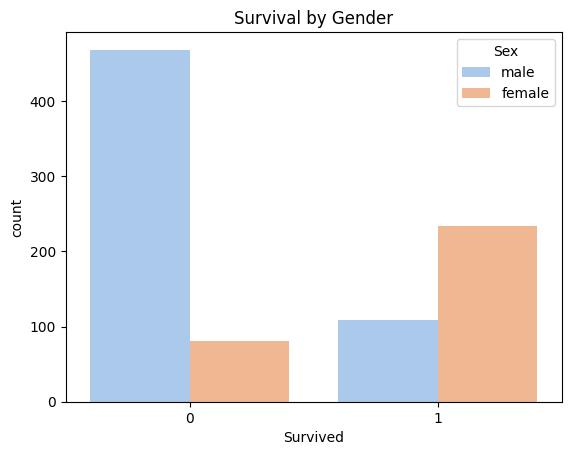

In [10]:
# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df, palette="pastel")
plt.title("Survival by Gender")
plt.show()

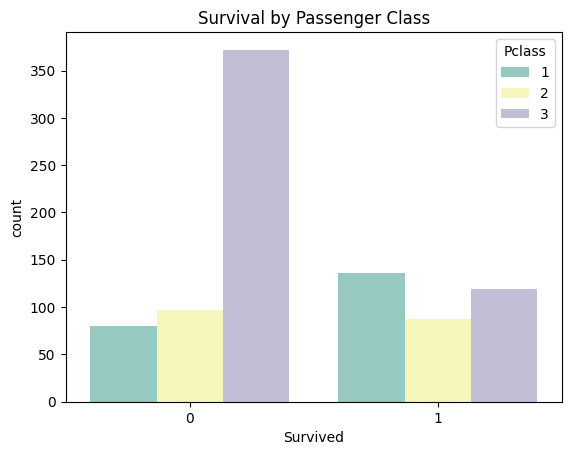

In [11]:
# Survival by Class
sns.countplot(x='Survived', hue='Pclass', data=df, palette="Set3")
plt.title("Survival by Passenger Class")
plt.show()

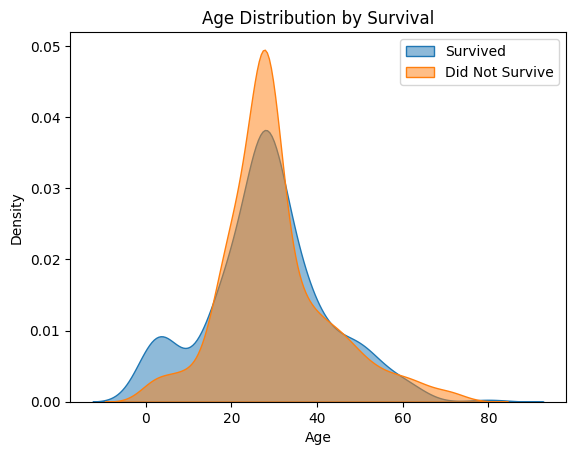

In [12]:
# Age Distribution by Survival
sns.kdeplot(data=df[df['Survived']==1], x="Age", label="Survived", fill=True, alpha=0.5)
sns.kdeplot(data=df[df['Survived']==0], x="Age", label="Did Not Survive", fill=True, alpha=0.5)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

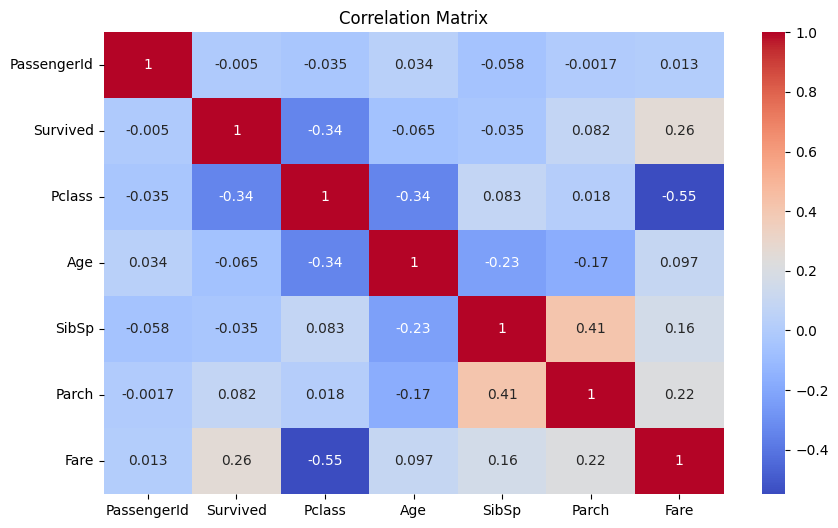

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = df.drop(columns=['Name', 'Sex', 'Ticket', 'Embarked'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()